In [55]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
page = 1
num_per_page = 100
area = 113
job=['Аналитик данных']
url = f'https://api.hh.ru/vacancies?text={job}&page={page}&per_page={num_per_page}&area={area}'
url = f'https://api.hh.ru/vacancies?text={job}&page={page}&per_page={num_per_page}&area={area}'

In [56]:
res = requests.get(url)

In [57]:
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [58]:
v = vacancies.get('items')

In [59]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [60]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [61]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [62]:
vnum  = vacancies.get('pages')

In [13]:
all_vacancy_ids= []
all_vacancy_items= []
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies?text={job}&page={i}&per_page={num_per_page}&area={area}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_items = res.json().get('items')
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)
    all_vacancy_items.extend(vacancy_items)

  0%|          | 0/20 [00:00<?, ?it/s]

In [14]:
# сохраним json в файл
with open('vacancy_items.json', 'w', encoding='utf-8') as f:
    json.dump(vacancy_items, f, ensure_ascii=False, indent=4)
with open('vacancies.json', 'w', encoding='utf-8') as f:
    json.dump(vacancies, f, ensure_ascii=False, indent=4)

In [63]:
# читаем json из файла
with open('vacancy_items.json', encoding='utf-8') as f:
    vacancy_items = json.load(f)
with open('vacancies.json', encoding='utf-8') as f:
    vacancies = json.load(f)

In [64]:
df = pd.DataFrame(all_vacancy_items)

In [65]:
df.shape

(2000, 29)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        2000 non-null   object
 1   premium                   2000 non-null   bool  
 2   name                      2000 non-null   object
 3   department                329 non-null    object
 4   has_test                  2000 non-null   bool  
 5   response_letter_required  2000 non-null   bool  
 6   area                      2000 non-null   object
 7   salary                    552 non-null    object
 8   type                      2000 non-null   object
 9   address                   1118 non-null   object
 10  response_url              0 non-null      object
 11  sort_point_distance       0 non-null      object
 12  published_at              2000 non-null   object
 13  created_at                2000 non-null   object
 14  archived                

In [67]:
df.head()

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,alternate_url,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary
0,70029179,False,Бизнес аналитик/Data аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': 170000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/70029179,[],"{'id': '1424', 'name': 'Odgers Berndtson', 'ur...",{'requirement': 'Опыт работы с Tableau/Power B...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
1,69360960,False,Аналитик данных / Data Analyst (управленческая...,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': 300000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Большая Тульская...",...,https://hh.ru/vacancy/69360960,[],"{'id': '2464267', 'name': 'Carely', 'url': 'ht...",{'requirement': 'Структурированно описывать би...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
2,70165043,False,Аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': 150000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Пресненская набе...",...,https://hh.ru/vacancy/70165043,[],"{'id': '5021275', 'name': 'НЬЮЭРАМЕДИА', 'url'...",{'requirement': 'Мыслить в цифрах. Успешный оп...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
3,69982142,False,Аналитик по отчетности,None,False,False,"{'id': '88', 'name': 'Казань', 'url': 'https:/...","{'from': 100000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Казань', 'street': 'проспект Победы'...",...,https://hh.ru/vacancy/69982142,[],"{'id': '1191643', 'name': 'IDF Eurasia', 'url'...",{'requirement': 'Хорошее знание Excel (сводные...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
4,70049715,False,Аналитик данных (SQL),None,False,False,"{'id': '53', 'name': 'Краснодар', 'url': 'http...","{'from': 70000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Краснодар', 'street': 'улица Красных...",...,https://hh.ru/vacancy/70049715,[],"{'id': '2813915', 'name': 'ПРОФИТКЛИКС', 'url'...",{'requirement': 'Умение работать с БД и SQL за...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False


In [89]:
# функция для извлечения поля name из объекта json
def get_name(cell):
    return cell['name']   

In [90]:
target_df = df[['id', 'name', 'area', 'salary','published_at','employer', 'schedule']]
target_df.shape

(2000, 7)

In [ ]:
# сохраним json в файл
with open('var.json', 'w', encoding='utf-8') as f:
    json.dump(var, f, ensure_ascii=False, indent=4)

In [92]:
with open('var.json', encoding='utf-8') as f:
    var = json.load(f)

In [93]:
additional = pd.DataFrame(var) 

In [94]:
additional.shape

(16421, 49)

In [95]:
additional.head()

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,...,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,languages,errors,request_id
0,69360960,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Аналитик данных / Data Analyst (управленческая...,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': 300000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",...,False,None,https://hh.ru/vacancy/69360960,[],[],[],False,"[{'id': 'eng', 'name': 'Английский', 'level': ...",NaN,NaN
1,69982142,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Аналитик по отчетности,None,False,"{'id': '88', 'name': 'Казань', 'url': 'https:/...","{'from': 100000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,False,None,https://hh.ru/vacancy/69982142,[],[],[],False,[],NaN,NaN
2,70167798,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Аналитик данных,None,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 60000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,False,None,https://hh.ru/vacancy/70167798,[],[],[],True,[],NaN,NaN
3,69647954,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Аналитик данных / Data Analyst,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 60000, 'to': 90000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,True,{'required': True},https://hh.ru/vacancy/69647954,[],[],[],False,[],NaN,NaN
4,70049715,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Аналитик данных (SQL),None,False,"{'id': '53', 'name': 'Краснодар', 'url': 'http...","{'from': 65000, 'to': 70000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,False,None,https://hh.ru/vacancy/70049715,[],[],[],False,[],NaN,NaN


In [96]:
additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16421 entries, 0 to 16420
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4002 non-null   object 
 1   premium                       4002 non-null   object 
 2   billing_type                  4002 non-null   object 
 3   relations                     4002 non-null   object 
 4   name                          4002 non-null   object 
 5   insider_interview             58 non-null     object 
 6   response_letter_required      4002 non-null   object 
 7   area                          4002 non-null   object 
 8   salary                        1481 non-null   object 
 9   type                          4002 non-null   object 
 10  address                       2403 non-null   object 
 11  allow_messages                4002 non-null   object 
 12  experience                    4002 non-null   object 
 13  s

In [97]:
target_df.head()

,id,name,area,salary,published_at,employer,schedule
0,70029179,Бизнес аналитик/Data аналитик,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': 170000, 'currency': 'RU...",2022-09-26T13:23:36+0300,"{'id': '1424', 'name': 'Odgers Berndtson', 'ur...","{'id': 'fullDay', 'name': 'Полный день'}"
1,69360960,Аналитик данных / Data Analyst (управленческая...,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,"{'id': '2464267', 'name': 'Carely', 'url': 'ht...","{'id': 'remote', 'name': 'Удаленная работа'}"
2,70165043,Аналитик,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': 150000, 'currency': 'RU...",2022-09-25T15:15:54+0300,"{'id': '5021275', 'name': 'НЬЮЭРАМЕДИА', 'url'...","{'id': 'fullDay', 'name': 'Полный день'}"
3,69982142,Аналитик по отчетности,"{'id': '88', 'name': 'Казань', 'url': 'https:/...","{'from': 100000, 'to': None, 'currency': 'RUR'...",2022-09-25T16:13:57+0300,"{'id': '1191643', 'name': 'IDF Eurasia', 'url'...","{'id': 'fullDay', 'name': 'Полный день'}"
4,70049715,Аналитик данных (SQL),"{'id': '53', 'name': 'Краснодар', 'url': 'http...","{'from': 70000, 'to': None, 'currency': 'RUR',...",2022-09-26T17:30:52+0300,"{'id': '2813915', 'name': 'ПРОФИТКЛИКС', 'url'...","{'id': 'fullDay', 'name': 'Полный день'}"


In [98]:
# заполняем уровни опыта
target_df.loc[target_df['name'].str.contains('Senior'), 'level_exp'] = 'Senior'
target_df.loc[target_df['name'].str.contains('Junior'), 'level_exp'] = 'Junior'
target_df.loc[target_df['name'].str.contains('Младший'), 'level_exp'] = 'Junior'
target_df.loc[target_df['name'].str.contains('Ведущий'), 'level_exp'] = 'Middle'
target_df.loc[target_df['name'].str.contains('Middle'), 'level_exp'] = 'Middle'
target_df.loc[target_df['name'].str.contains('Chief'), 'level_exp'] = 'Head'
target_df.loc[target_df['name'].str.contains('Head'), 'level_exp'] = 'Head'


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [99]:
# преобразуем словари
target_df.loc[:,'area'] = target_df['area'].apply(get_name)
target_df.loc[:,'employer'] = target_df['employer'].apply(get_name)
target_df.loc[:,'schedule'] = target_df['schedule'].apply(get_name)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [100]:
# Промежуточный результат преобразований
target_df.head()

,id,name,area,salary,published_at,employer,schedule,level_exp
0,70029179,Бизнес аналитик/Data аналитик,Москва,"{'from': 150000, 'to': 170000, 'currency': 'RU...",2022-09-26T13:23:36+0300,Odgers Berndtson,Полный день,NaN
1,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN
2,70165043,Аналитик,Москва,"{'from': 100000, 'to': 150000, 'currency': 'RU...",2022-09-25T15:15:54+0300,НЬЮЭРАМЕДИА,Полный день,NaN
3,69982142,Аналитик по отчетности,Казань,"{'from': 100000, 'to': None, 'currency': 'RUR'...",2022-09-25T16:13:57+0300,IDF Eurasia,Полный день,NaN
4,70049715,Аналитик данных (SQL),Краснодар,"{'from': 70000, 'to': None, 'currency': 'RUR',...",2022-09-26T17:30:52+0300,ПРОФИТКЛИКС,Полный день,NaN


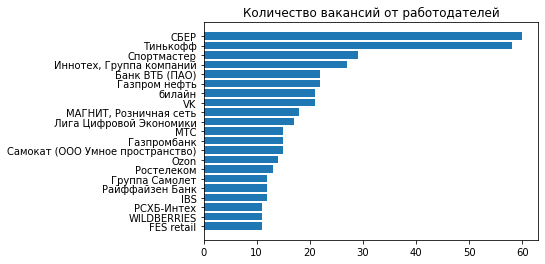

In [172]:
# выведем наибольший спрос от работодателей

#target_df.groupby('employer')['id'].count()
s = target_df.groupby('employer').size()
vac_by_empl = s[s.values>10].sort_values()
emp = vac_by_empl.index
val = vac_by_empl.values
plt.barh(emp,val)

plt.xlabel = 'Работодатели'
plt.ylabel = 'Вакансии'
plt.title('Количество вакансий от работодателей')
plt.show()

In [103]:
add_without_exp = additional[~additional['experience'].isnull()]

In [104]:
# попытка заполнить недостающие данные
add_info = add_without_exp[['id', 'experience','key_skills']]
add_info['exb_by_year'] = add_info['experience'].apply(get_name)
add_info.loc[:,'experience'] = add_info['experience'].apply(get_name)
#add_info.drop('experience', axis=1, inplace=True)

C:\Users\vg207\AppData\Local\Temp/ipykernel_14936/3073032027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_info['exb_by_year'] = add_info['experience'].apply(get_name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [106]:
emp_map = {'Нет опыта':'Junior', 'От 1 года до 3 лет':'Middle', 'От 3 до 6 лет':'Senior', 'Более 6 лет': 'Senior'}
add_info.loc[:,'exb_by_year'] = add_info['exb_by_year'].map(emp_map)

In [107]:
target_df_full = pd.merge(target_df, add_info, on='id', how='left')   

In [108]:
target_df_full.head()

,id,name,area,salary,published_at,employer,schedule,level_exp,experience,key_skills,exb_by_year
0,70029179,Бизнес аналитик/Data аналитик,Москва,"{'from': 150000, 'to': 170000, 'currency': 'RU...",2022-09-26T13:23:36+0300,Odgers Berndtson,Полный день,NaN,Нет опыта,"[{'name': 'Tableau'}, {'name': 'SQL'}, {'name'...",NaN
1,70029179,Бизнес аналитик/Data аналитик,Москва,"{'from': 150000, 'to': 170000, 'currency': 'RU...",2022-09-26T13:23:36+0300,Odgers Berndtson,Полный день,NaN,Нет опыта,"[{'name': 'Tableau'}, {'name': 'SQL'}, {'name'...",NaN
2,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",NaN
3,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",NaN
4,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",NaN


In [109]:
target_df_full[['salary']].describe()

,salary
count,832
unique,262
top,"{'from': 100000, 'to': None, 'currency': 'RUR'..."
freq,36


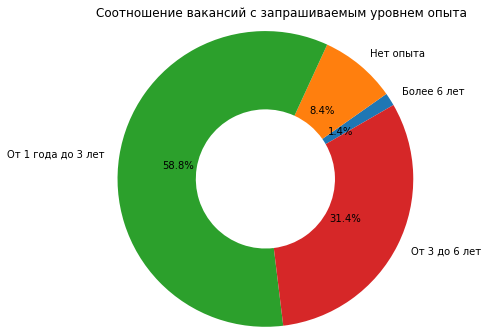

In [110]:
# соотношение вакансий с запрашиваемым уровнем опыта
exp = target_df_full.groupby('experience').size()
labels = exp.index
sizes = exp.values
fig, ax = plt.subplots()
wedge_properties = {"width":0.9}
ax.pie(sizes, labels=labels, autopct='%.1f%%', wedgeprops=wedge_properties, startangle=30, radius = 1.7)
fig.suptitle('Соотношение вакансий с запрашиваемым уровнем опыта', x=0.55, y=1.1)
plt.show()

In [111]:
def get_curr(cell):
    if cell is None:
        return 'RUR'
    else:
        return cell['currency']

In [112]:
def get_salary(cell):
    EUR = 56.48
    USD = 58.1
    if cell is None:
        return None
    else:
        from_sal = cell['from']
        to_sal = cell['to']
        if to_sal is None:
            if get_curr(cell) == 'RUR':
                salary = from_sal
            elif get_curr(cell) == 'EUR':
                salary = from_sal*EUR
            elif get_curr(cell) == 'USD':
                salary = from_sal*USD
        else:
            salary = to_sal
            if get_curr(cell) == 'RUR':
                salary = to_sal
            elif get_curr(cell) == 'EUR':
                salary = to_sal*EUR
            elif get_curr(cell) == 'USD':
                salary = to_sal*USD
            
        return salary

def get_salary_from(cell):
    EUR = 56.48
    USD = 58.1
    if cell is None:
        return None
    else:
        from_sal = cell['from']
        to_sal = cell['to']
        if from_sal is None:
            salary=0
        else:
            if get_curr(cell) == 'RUR':
                salary = from_sal
            elif get_curr(cell) == 'EUR':
                salary = from_sal*EUR
            elif get_curr(cell) == 'USD':
                salary = from_sal*USD
    return salary
    
    
    

In [113]:
d = {'from': 10 , 'to': None, 'currency': 'EUR'}
get_salary(d)
#get_salary_from(d)

564.8

In [114]:
salary_by_city = target_df_full[['area','salary']]

In [115]:
salary_is_null = salary_by_city[['salary']].isnull().sum()
print(salary_is_null)
d = salary_by_city['area'].count()
n = salary_by_city['salary'].count()

salary    1949
dtype: int64


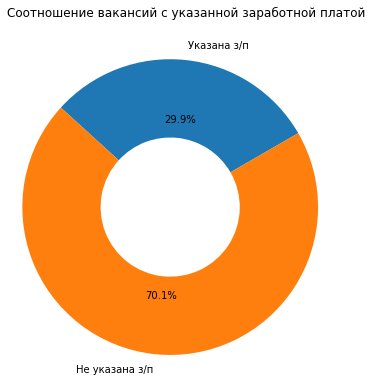

In [116]:
labels = ['Указана з/п','Не указана з/п']
sizes = [n, d-n]
fig, ax = plt.subplots()
wedge_properties = {"width":0.9}
ax.pie(sizes, labels=labels, autopct='%.1f%%', wedgeprops=wedge_properties, startangle=30, radius = 1.7)
fig.suptitle('Соотношение вакансий с указанной заработной платой', x=0.55, y=1.2)
plt.show()

In [117]:
target_df_full.loc[:,'salary_from'] = target_df_full['salary'].apply(get_salary_from)
target_df_full.loc[:,'salary_to'] = target_df_full['salary'].apply(get_salary)
target_df_full.loc[:,'currency'] = target_df_full['salary'].apply(get_curr)

In [118]:
eur = 56.48
usd = 58.1

In [119]:
target_df_full['currency'].unique()

array(['RUR', 'USD', 'EUR'], dtype=object)

In [120]:
#target_df_full.drop('salary', inplace=True, axis = 1)

In [121]:
target_df_full.head(15)

,id,name,area,salary,published_at,employer,schedule,level_exp,experience,key_skills,exb_by_year,salary_from,salary_to,currency
0,70029179,Бизнес аналитик/Data аналитик,Москва,"{'from': 150000, 'to': 170000, 'currency': 'RU...",2022-09-26T13:23:36+0300,Odgers Berndtson,Полный день,NaN,Нет опыта,"[{'name': 'Tableau'}, {'name': 'SQL'}, {'name'...",NaN,150000.0,170000.0,RUR
1,70029179,Бизнес аналитик/Data аналитик,Москва,"{'from': 150000, 'to': 170000, 'currency': 'RU...",2022-09-26T13:23:36+0300,Odgers Berndtson,Полный день,NaN,Нет опыта,"[{'name': 'Tableau'}, {'name': 'SQL'}, {'name'...",NaN,150000.0,170000.0,RUR
2,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",NaN,150000.0,300000.0,RUR
3,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",NaN,150000.0,300000.0,RUR
4,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",NaN,150000.0,300000.0,RUR
5,70165043,Аналитик,Москва,"{'from': 100000, 'to': 150000, 'currency': 'RU...",2022-09-25T15:15:54+0300,НЬЮЭРАМЕДИА,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Power BI'}, {'name...",NaN,100000.0,150000.0,RUR
6,70165043,Аналитик,Москва,"{'from': 100000, 'to': 150000, 'currency': 'RU...",2022-09-25T15:15:54+0300,НЬЮЭРАМЕДИА,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Power BI'}, {'name...",NaN,100000.0,150000.0,RUR
7,70165043,Аналитик,Москва,"{'from': 100000, 'to': 150000, 'currency': 'RU...",2022-09-25T15:15:54+0300,НЬЮЭРАМЕДИА,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Power BI'}, {'name...",NaN,100000.0,150000.0,RUR
8,69982142,Аналитик по отчетности,Казань,"{'from': 100000, 'to': None, 'currency': 'RUR'...",2022-09-25T16:13:57+0300,IDF Eurasia,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Работа с базами да...",NaN,100000.0,100000.0,RUR
9,69982142,Аналитик по отчетности,Казань,"{'from': 100000, 'to': None, 'currency': 'RUR'...",2022-09-25T16:13:57+0300,IDF Eurasia,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Работа с базами да...",NaN,100000.0,100000.0,RUR


In [122]:
# круговая диаграмма с соотношением вакансий с зарплатами и без зарплаты
#target_df_full[~target_df_full[['salary_from']].isnull()]
target_df_full[['salary_from','salary_to']].describe()
#target_df_full[(target_df_full['salary_from']==0) and (target_df_full['salary_to']==0)]

,salary_from,salary_to
count,832.000000,832.000000
mean,75187.140625,118048.882212
std,61639.278408,77193.728550
min,0.000000,10000.000000
25%,35000.000000,60000.000000
50%,70000.000000,100000.000000
75%,100000.000000,150000.000000
max,350000.000000,500000.000000


In [123]:
target_df_full.isna().mean()

id              0.000000
name            0.000000
area            0.000000
salary          0.700827
published_at    0.000000
employer        0.000000
schedule        0.000000
level_exp       0.901115
experience      0.061129
key_skills      0.061129
exb_by_year     1.000000
salary_from     0.700827
salary_to       0.700827
currency        0.000000
dtype: float64

In [124]:
#sk = [{'name': 'Статистический анализ'}, {'name': 'fsdfd'}]

In [125]:

def get_skills(cell):
    d = []
    for el in cell:
#        print(el)
#        print(el['name'])
        d.append(el['name'])
    return d
        #d.append(cell.name[])

In [128]:
vac_without_skill = target_df_full[~target_df_full['key_skills'].isnull()]

In [131]:
vac_without_skill['key_skills'].apply(get_skills)

0       [Tableau, SQL, Power BI, Работа с базами данны...
1       [Tableau, SQL, Power BI, Работа с базами данны...
2       [SQL, Python, Tableau, Data Analysis, Power BI...
3       [SQL, Python, Tableau, Data Analysis, Power BI...
4       [SQL, Python, Tableau, Data Analysis, Power BI...
                              ...                        
2776    [Информационная безопасность, Аналитическое мы...
2777    [MS PowerPoint, Бизнес-анализ, Анализ данных, ...
2778    [MS PowerPoint, Бизнес-анализ, Анализ данных, ...
2779    [Atlassian Jira, Atlassian Confluence, SQL, Ан...
2780    [Atlassian Jira, Atlassian Confluence, SQL, Ан...
Name: key_skills, Length: 2611, dtype: object

In [132]:
#target_df_full['skills'] = 
target_df_full['skills'] = vac_without_skill['key_skills'].apply(get_skills)
#target_df_full['key_skills'].apply(get_skills)

In [175]:
target_df_full.head()

,id,name,area,salary,published_at,employer,schedule,level_exp,experience,key_skills,exb_by_year,salary_from,salary_to,currency,skills
0,70029179,Бизнес аналитик/Data аналитик,Москва,"{'from': 150000, 'to': 170000, 'currency': 'RU...",2022-09-26T13:23:36+0300,Odgers Berndtson,Полный день,NaN,Нет опыта,"[{'name': 'Tableau'}, {'name': 'SQL'}, {'name'...",NaN,150000.0,170000.0,RUR,"[Tableau, SQL, Power BI, Работа с базами данны..."
1,70029179,Бизнес аналитик/Data аналитик,Москва,"{'from': 150000, 'to': 170000, 'currency': 'RU...",2022-09-26T13:23:36+0300,Odgers Berndtson,Полный день,NaN,Нет опыта,"[{'name': 'Tableau'}, {'name': 'SQL'}, {'name'...",NaN,150000.0,170000.0,RUR,"[Tableau, SQL, Power BI, Работа с базами данны..."
2,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",NaN,150000.0,300000.0,RUR,"[SQL, Python, Tableau, Data Analysis, Power BI..."
3,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",NaN,150000.0,300000.0,RUR,"[SQL, Python, Tableau, Data Analysis, Power BI..."
4,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",NaN,150000.0,300000.0,RUR,"[SQL, Python, Tableau, Data Analysis, Power BI..."


In [176]:
# Круговая диаграмма - подготовка данных
pie = target_df_full.groupby('schedule')['id'].count()
#pie.first()
pie

schedule
Гибкий график         80
Полный день         2178
Сменный график        13
Удаленная работа     510
Name: id, dtype: int64

In [177]:
pie.index

Index(['Гибкий график', 'Полный день', 'Сменный график', 'Удаленная работа'], dtype='object', name='schedule')

<AxesSubplot:xlabel='schedule'>

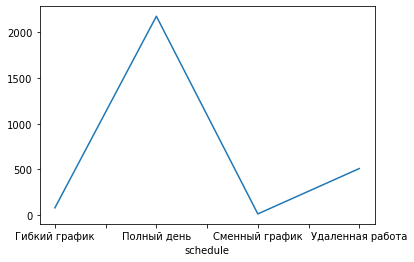

In [178]:
pie.plot()

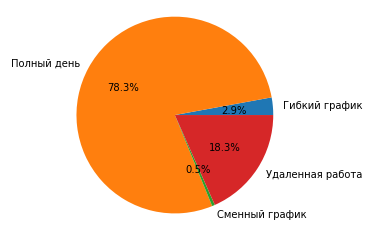

In [179]:
# Круговая диаграмма
labels = pie.index
fig1, ax1 = plt.subplots()
ax1.pie(pie, labels=labels, autopct='%1.1f%%') # №, explode = explode)
ax1.axis('equal')  
plt.show()

#вывести заголовок


In [180]:
df0 = target_df_full[~target_df_full['skills'].isnull()]

In [181]:
# получим список скилов для облака тегов
lst = sum(df0['skills'], [])

# посмотрим, сколько навыков набралось всего (неуникальных)
#list_skills = target_df_full.skills

In [182]:
!pip install wordcloud

In [183]:
from wordcloud import WordCloud

In [184]:
# преобразуем словарь в текст
s = ' '.join(lst)
#''.join('{}{}'.format(key, val) for key, val in lst.items())

In [185]:
!pip install corpus

In [186]:
#from nltk.corpus import stopwords
# сохраняем список с русскими стоп-cловами в переменную stop_words
#stop_words = stopwords.words('russian')

In [187]:
stop_words = open('stop-ru.txt', 'r', encoding='utf8')
stop_words = stop_words.read()
stop_words = stop_words.split('\n')

In [188]:
clear_data=[]
for i in lst:
    if(i not in stop_words):
        clear_data.append(i)

In [189]:
len(clear_data)

15890

In [190]:
big_string=''
for i in range(len(clear_data)):
    big_string+=(clear_data[i]+' ')

(-0.5, 599.5, 299.5, -0.5)

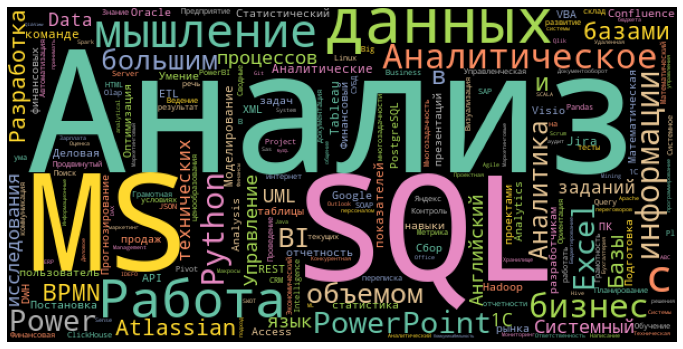

In [191]:
# Генерируем облако слов и сохраняем в переменной cloud
# cloud = WordCloud(max_words=30).generate(big_string)
cloud = WordCloud(width = 600, height = 300, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(big_string)
# Выводим облако слов на экран
#plt.imshow(cloud)
plt.figure(figsize=(12,12))
plt.imshow(cloud)
#plt.axis('off')
# Отключаем отображение осей
plt.axis('off')

In [192]:
import seaborn as sns

In [193]:
emp_map = {'Нет опыта':'Junior', 'От 1 года до 3 лет':'Middle', 'От 3 до 6 лет':'Senior', 'Более 6 лет': 'Senior'}
add_info.loc[:,'exb_by_year'] = add_info['exb_by_year'].map(emp_map)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [194]:
s = target_df_full.groupby('area').size()
vac_by_cities = s[s.values>10]

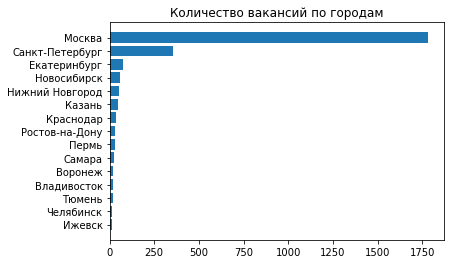

In [195]:
s = target_df_full.groupby('area').size()
vac_by_empl = s[s.values>10].sort_values()
emp = vac_by_empl.index
val = vac_by_empl.values
plt.barh(emp,val)
plt.title('Количество вакансий по городам')
plt.show()

In [196]:
#vac_by_cities.plot(x='index', y='values', kind='barh', fontsize=14, figsize=(5,5))

# столбиковая диаграмма
# подписать 
# отсортировать!
# заголовок
# название осей


In [197]:
sal = target_df_full[~target_df_full['salary'].isnull()]
#sal_sorted = sal['salary_to'].sort_values(ascending=False)
#sal_sorted.head()

In [208]:
#sl0 = sal[sal['salary_from']==0].drop()
sl0 = sal.loc[sal['salary_from']!=0]
sl0 = sl0.loc[sl0['salary_from']==sl0['salary_to']]
#city_df = city_df.loc[city_df['Площадь'] > 1000]

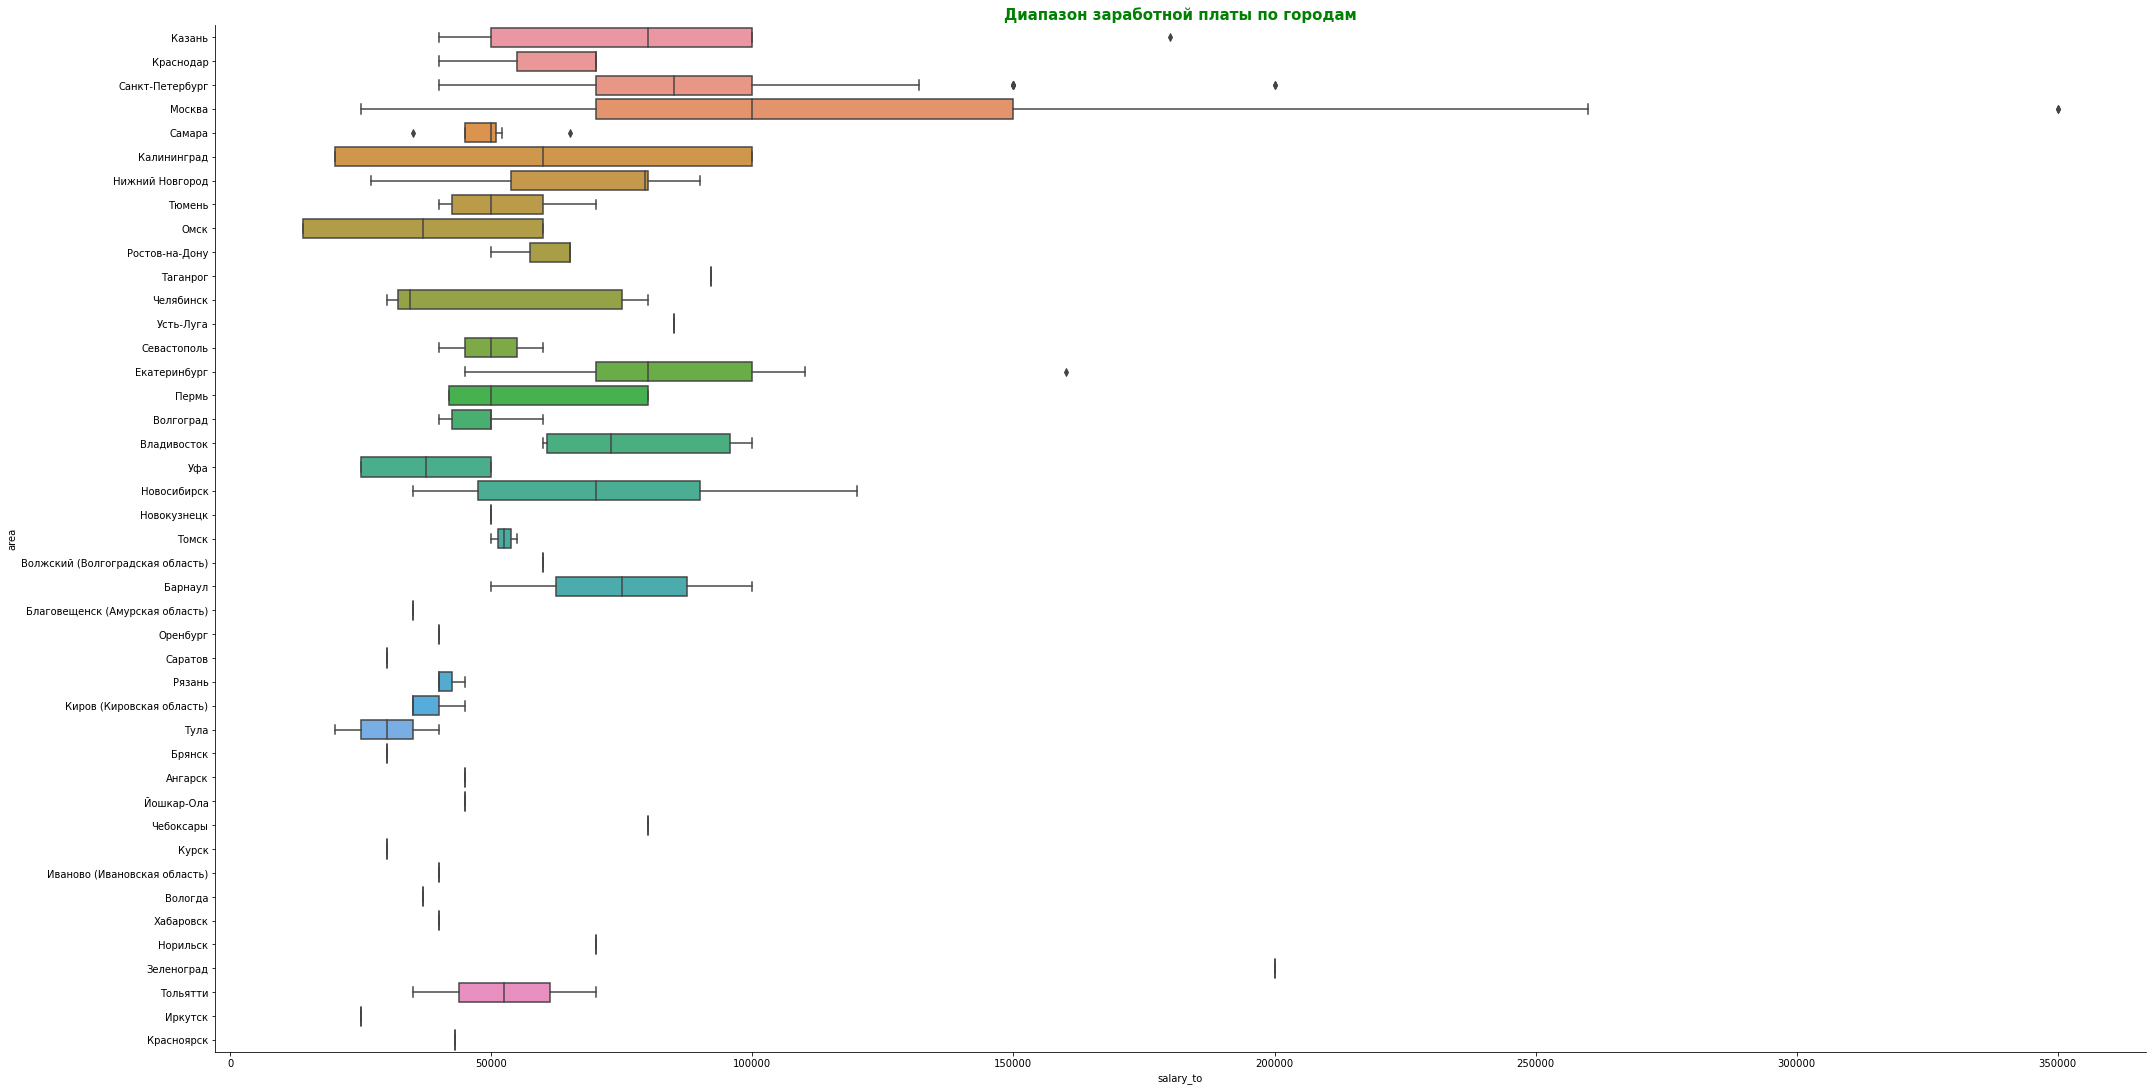

In [209]:
sns.catplot(
    y='area', 
    x='salary_to', 
    data=sl0, 
    kind='box', 
    #hue='Promotion',
    height=15, 
    aspect=2);
plt.title('Диапазон заработной платы по городам',
          size=15, 
          color='g', 
          weight='bold');

In [214]:
# Предсказание заработной платы линейной регрессией
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [215]:
# Определим количество пустых значений
target_df_full.isna().sum()

id                 0
name               0
area               0
salary          1949
published_at       0
employer           0
schedule           0
level_exp       2506
experience       170
key_skills       170
exb_by_year     2781
salary_from     1949
salary_to       1949
currency           0
skills           170
dtype: int64

In [216]:
le = preprocessing.LabelEncoder()

target_df_full['area_dig'] = le.fit_transform(target_df_full['area'])
target_df_full['sched_dig'] = le.fit_transform(target_df_full['schedule'])
target_df_full['exp_dig'] = le.fit_transform(target_df_full['experience'])
target_df_full['empl_dig'] = le.fit_transform(target_df_full['employer'])

#target_df_full['skills_dig'] = le.fit_transform(target_df_full['skills'])

target_df_full.head(3)

,id,name,area,salary,published_at,employer,schedule,level_exp,experience,key_skills,exb_by_year,salary_from,salary_to,currency,skills,area_dig,sched_dig,exp_dig,empl_dig
0,70029179,Бизнес аналитик/Data аналитик,Москва,"{'from': 150000, 'to': 170000, 'currency': 'RU...",2022-09-26T13:23:36+0300,Odgers Berndtson,Полный день,NaN,Нет опыта,"[{'name': 'Tableau'}, {'name': 'SQL'}, {'name'...",NaN,150000.0,170000.0,RUR,"[Tableau, SQL, Power BI, Работа с базами данны...",33,1,1,171
1,70029179,Бизнес аналитик/Data аналитик,Москва,"{'from': 150000, 'to': 170000, 'currency': 'RU...",2022-09-26T13:23:36+0300,Odgers Berndtson,Полный день,NaN,Нет опыта,"[{'name': 'Tableau'}, {'name': 'SQL'}, {'name'...",NaN,150000.0,170000.0,RUR,"[Tableau, SQL, Power BI, Работа с базами данны...",33,1,1,171
2,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",NaN,150000.0,300000.0,RUR,"[SQL, Python, Tableau, Data Analysis, Power BI...",33,3,3,46


In [217]:
sal_feat = target_df_full[~target_df_full['salary_to'].isna()][['salary_to','area_dig', 'exp_dig', 'sched_dig','empl_dig']]
sal_feat.head()

,salary_to,area_dig,exp_dig,sched_dig,empl_dig
0,170000.0,33,1,1,171
1,170000.0,33,1,1,171
2,300000.0,33,3,3,46
3,300000.0,33,3,3,46
4,300000.0,33,3,3,46


In [218]:
X = sal_feat.drop('salary_to', axis = 1)
y = sal_feat['salary_to']

In [219]:
# разобьем датасет
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    shuffle=True, 
                                                    random_state=16)

print(X_train.shape,X_test.shape)

(582, 4) (250, 4)


In [220]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [221]:
predict = model.predict(X_test)

In [222]:
X_test_copy = X_test.copy()

sal_with_predict = X_test_copy
sal_with_predict['real_salary'] = y_test
sal_with_predict['predict_salary'] = predict

sal_with_predict[['real_salary','predict_salary']].head(10)

,real_salary,predict_salary
491,50000.0,58617.371329
2444,250000.0,95954.746011
30,200000.0,94378.164705
2025,100000.0,121067.433963
2006,200000.0,109152.020787
2383,200000.0,155201.207656
2419,157000.0,132847.536990
433,45000.0,109413.204513
807,71000.0,115774.625292
1372,120000.0,120474.546545


In [223]:
from sklearn.tree import DecisionTreeRegressor

In [224]:
tree_regressor = DecisionTreeRegressor()

tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [225]:
predict_tree = tree_regressor.predict(X_test)

In [226]:
X_test_copy = X_test.copy()

titanic_with_predict_tree = X_test_copy
titanic_with_predict_tree['real_salary'] = y_test
titanic_with_predict_tree['predict_salary'] = predict_tree

#titanic_with_predict[['real_age','predict_age']].head(10)
titanic_with_predict_tree[['real_salary','predict_salary']].head(10)

,real_salary,predict_salary
491,50000.0,30000.000000
2444,250000.0,120000.000000
30,200000.0,200000.000000
2025,100000.0,100000.000000
2006,200000.0,233333.333333
2383,200000.0,200000.000000
2419,157000.0,157000.000000
433,45000.0,45000.000000
807,71000.0,166666.666667
1372,120000.0,100000.000000


In [228]:
frame = {'Важность параметра':tree_regressor.feature_importances_, 'Фича':X_train.columns}
result = pd.DataFrame(frame)

result.sort_values(by='Важность параметра', ascending=False)

,Важность параметра,Фича
3,0.555470,empl_dig
1,0.215869,exp_dig
0,0.184791,area_dig
2,0.043870,sched_dig


In [230]:
from sklearn.metrics import mean_absolute_error

In [231]:
print('MAE on Linear Regression', mean_absolute_error(y_test, predict))
print('MAE on DecisionTreeRegressor', mean_absolute_error(y_test, predict_tree))

MAE on Linear Regression 52943.04392061089
MAE on DecisionTreeRegressor 34858.88
